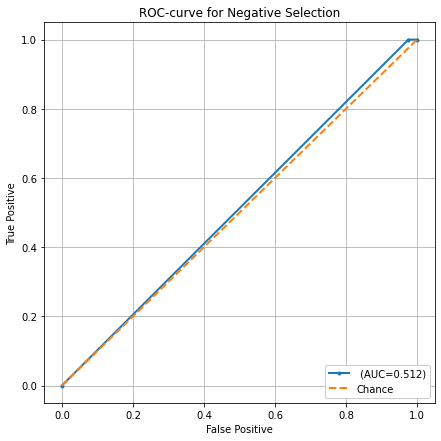

In [9]:
import os, shutil
import pickle
import subprocess
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

SYSCALLS = ["negative-selection"]
OUT_DIR = "output"
TEMP_DIR = "temporary"
IMG_DIR = f"{OUT_DIR}/images"
TEST_FILE = "english_tagalog.test"
    
def generate_curve(n, r, ground, prediction):
    fpr, tpr, _ = roc_curve(ground, prediction)
    auc_score = auc(fpr, tpr)
    nas_fpr, nas_tpr, _ = roc_curve(ground, np.zeros(len(prediction),))
    plt.figure(figsize=(7, 7))
    plt.grid()
    plt.plot(fpr, tpr, marker='.', label=f' (AUC={auc_score:.3f})', linewidth=2)
    plt.plot(nas_fpr, nas_tpr, linestyle='--', label='Chance', linewidth=2)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title(f"ROC-curve for Negative Selection")
    plt.legend(loc=4, framealpha=1)

def negative_selection(n, r, count=True, log=False):
    count_parameters = "-c" if count else ""
    log_parameters = "-l" if log else ""
    os.system(f"java -jar negsel2.jar -self english.train -n {n} -r {r} \
                {count_parameters} {log_parameters} < english_tagalog.test \
                > {OUT_DIR}/N={n}-R={r}-output.txt")

def run_negative_selection(n, r):
    negative_selection(n, r, count=True, log=True)
    output_file = open(f"{OUT_DIR}/N={n}-R={r}-output.txt")
    prediction = [float(line.strip()) for line in output_file.readlines()]
    ground = np.zeros(len(prediction))
    nr_english = len(open("english.test").readlines())
    ground[nr_english:] = 1
    

    generate_curve(n, r, ground, prediction)
    plt.savefig(f"{IMG_DIR}/N={n}-R={r}-roc.png")

def main():
    n = 10
    r = 9
    run_negative_selection(n, r)


if __name__=='__main__':
    main()